In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [56]:
dados = pd.read_csv("dados_pre_processados.csv")
dados.drop("Unnamed: 0", axis=1, inplace=True)
dados.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,1.011,C,930,2124.0,28,N,3051.0,15.0,0.9,10.50,18.37,13,205841,23.266913,18.868387,0.027130
1,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,11.69,19.55,13,205841,23.266913,20.723169,0.060009
2,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,10.16,16.73,13,205841,23.266913,18.332992,0.095815
3,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,13.52,17.19,13,205841,23.266913,23.522874,0.368405
4,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,7.71,13.52,13,205841,23.266913,14.392958,0.064568


In [57]:
dados_por_aglomerante = dados.groupby("CodigoAglomerante")

In [58]:
dados_3051 = dados_por_aglomerante.get_group(3051.0)

In [59]:
fig = px.box(dados_3051, x="TipoLancamento", y="Rompimento28Dias", title='Influência do Tipo de Lançamento no Resultado')
fig.show()

In [60]:
fig = px.box(dados_3051, x="TipoTraco", y="Rompimento28Dias", title='Influência do Tipo de Traço no Resultado')
fig.show()

In [61]:
fig = px.box(dados_3051, x="CodigoFornecedorCimento", y="Rompimento28Dias", title='Influência do Fornecedor do Cimento no Resultado')
fig.show()

In [62]:
fig = px.scatter(dados_3051, x="Rompimento7Dias", y="Rompimento28Dias")
fig.show()

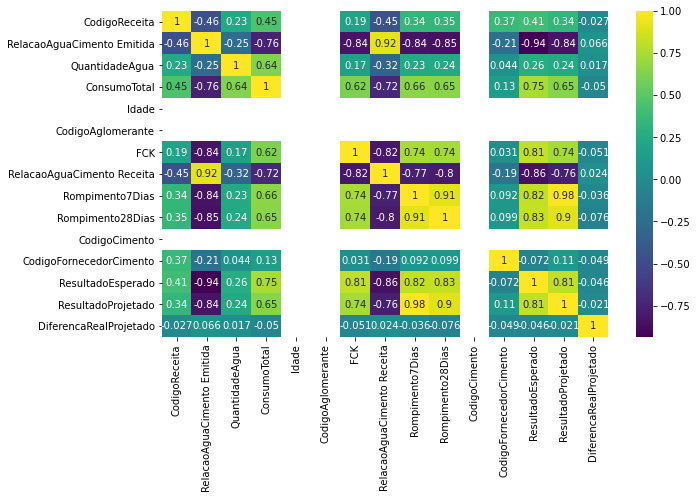

In [63]:
features_numericas = dados_3051.select_dtypes(include=['int', 'float'])

k = features_numericas.shape[1] #number of variables for heatmap
cols = dados_3051.corr().index
cm = dados_3051[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [64]:
dados_3051.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,1.011,C,930,2124.0,28,N,3051.0,15.0,0.9,10.50,18.37,13,205841,23.266913,18.868387,0.027130
1,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,11.69,19.55,13,205841,23.266913,20.723169,0.060009
2,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,10.16,16.73,13,205841,23.266913,18.332992,0.095815
3,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,13.52,17.19,13,205841,23.266913,23.522874,0.368405
4,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,7.71,13.52,13,205841,23.266913,14.392958,0.064568


In [65]:
dados_3051["CodigoFornecedorCimento"].value_counts()

205841    5346
206605    2018
Name: CodigoFornecedorCimento, dtype: int64

In [66]:
dados_3051["TipoLancamento"].replace('C', 0, inplace = True)
dados_3051["TipoLancamento"].replace('B', 1, inplace = True)

dados_3051["TipoTraco"].replace('N', 0, inplace = True)
dados_3051["TipoTraco"].replace('E', 1, inplace = True)

dados_3051["CodigoCimento"].replace(13, 1, inplace = True)

dados_3051["CodigoFornecedorCimento"].replace(206605, 0, inplace = True)
dados_3051["CodigoFornecedorCimento"].replace(205841, 1, inplace = True)

dados_3051.columns = ['CodigoReceita', 'RelacaoAguaCimento Emitida', 'EhLancamentoBombeavel',
       'QuantidadeAgua', 'ConsumoTotal', 'Idade', 'EhTracoEspecial',
       'CodigoAglomerante', 'FCK', 'RelacaoAguaCimento Receita',
       'Rompimento7Dias', 'Rompimento28Dias', 'CodigoCimento',
       'CodigoFornecedorCimento', 'ResultadoEsperado', 'ResultadoProjetado',
       'DiferencaRealProjetado']

/home/marina/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
scaler = MinMaxScaler()
dados_3051["RelacaoAguaCimento Emitida"] = scaler.fit_transform(np.exp(dados_3051["RelacaoAguaCimento Emitida"]).values.reshape(-1, 1))
dados_3051["QuantidadeAgua"] = scaler.fit_transform(dados_3051["QuantidadeAgua"].values.reshape(-1, 1))
dados_3051["ConsumoTotal"] = scaler.fit_transform(dados_3051["ConsumoTotal"].values.reshape(-1, 1))
dados_3051["FCK"] = scaler.fit_transform(dados_3051["FCK"].values.reshape(-1, 1))

dados_3051["Rompimento7Dias"] = scaler.fit_transform(dados_3051["Rompimento7Dias"].values.reshape(-1, 1))
dados_3051["Rompimento28Dias"] = scaler.fit_transform(dados_3051["Rompimento28Dias"].values.reshape(-1, 1))

dados_3051.head()

<ipython-input-67-84b84b315263>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-84b84b315263>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-84b84b315263>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-84b84b3

,CodigoReceita,RelacaoAguaCimento Emitida,EhLancamentoBombeavel,QuantidadeAgua,ConsumoTotal,Idade,EhTracoEspecial,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,0.641887,0,0.370260,0.154120,28,0,3051.0,0.333333,0.9,0.148751,0.103677,1,1,23.266913,18.868387,0.027130
1,11051,0.641887,0,0.600743,0.268498,28,0,3051.0,0.333333,0.9,0.176026,0.128901,1,1,23.266913,20.723169,0.060009
2,11051,0.641887,0,0.600743,0.268498,28,0,3051.0,0.333333,0.9,0.140958,0.068619,1,1,23.266913,18.332992,0.095815
3,11051,0.641887,0,0.600743,0.268498,28,0,3051.0,0.333333,0.9,0.217969,0.078452,1,1,23.266913,23.522874,0.368405
4,11051,0.641887,0,0.600743,0.268498,28,0,3051.0,0.333333,0.9,0.084804,0.000000,1,1,23.266913,14.392958,0.064568


In [68]:
X = dados_3051.drop(["CodigoReceita", "CodigoAglomerante", "RelacaoAguaCimento Receita", "Idade", "Rompimento28Dias", "QuantidadeAgua", "ConsumoTotal", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1)
Y = dados_3051["Rompimento28Dias"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)

In [69]:
indices_x_test = x_test.index

In [70]:
X.columns

Index(['RelacaoAguaCimento Emitida', 'EhLancamentoBombeavel',
       'EhTracoEspecial', 'FCK', 'Rompimento7Dias', 'CodigoCimento',
       'CodigoFornecedorCimento'],
      dtype='object')

In [71]:
modelo = sm.OLS(y_train, x_train)
result = modelo.fit()

print(result.summary(yname='Rompimento28Dias', xname=['RelacaoAguaCimento Emitida', 'EhLancamentoBombeavel',
       'EhTracoEspecial', 'FCK', 'Rompimento7Dias', 'CodigoCimento',
       'CodigoFornecedorCimento']))

                            OLS Regression Results                            
Dep. Variable:       Rompimento28Dias   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     5173.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:46:28   Log-Likelihood:                 6913.4
No. Observations:                5154   AIC:                        -1.381e+04
Df Residuals:                    5147   BIC:                        -1.377e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
RelacaoAguaCimento E

In [72]:
modelo_skl = LinearRegression().fit(x_train, y_train)
modelo_skl.score(x_train, y_train)

y_pred = modelo_skl.predict(x_test)

mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.8513995060441085

In [73]:
mask_dados_teste = dados_3051.index.isin(indices_x_test)

dados_teste = dados_3051[mask_dados_teste]
dados_teste.head()

,CodigoReceita,RelacaoAguaCimento Emitida,EhLancamentoBombeavel,QuantidadeAgua,ConsumoTotal,Idade,EhTracoEspecial,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,0.641887,0,0.370260,0.154120,28,0,3051.0,0.333333,0.9,0.148751,0.103677,1,1,23.266913,18.868387,0.027130
8,11051,0.641887,0,0.370260,0.154120,28,0,3051.0,0.333333,0.9,0.162044,0.150919,1,1,23.266913,19.594071,0.047907
9,11051,0.641887,0,0.255019,0.096931,28,0,3051.0,0.333333,0.9,0.190007,0.206499,1,1,23.266913,21.361210,0.078464
10,11051,0.641887,0,0.511524,0.268498,28,0,3051.0,0.333333,0.9,0.141875,0.101112,1,1,23.266913,18.294298,0.002427
15,11051,0.641887,0,0.563569,0.297254,28,0,3051.0,0.333333,0.9,0.113683,0.070115,1,1,23.266913,16.438400,0.021524


In [74]:
comparativos = pd.DataFrame()

comparativos["ResultadoProjetado"] = dados_teste["ResultadoProjetado"]
comparativos["Rompimento28Dias"] = scaler.inverse_transform(dados_teste["Rompimento28Dias"].values.reshape(-1, 1))

comparativos.head()

,ResultadoProjetado,Rompimento28Dias
0,18.868387,18.37
8,19.594071,20.58
9,21.361210,23.18
10,18.294298,18.25
15,16.438400,16.80


In [75]:
comparativos["ProjetadoPeloModeloRegLin"] = result.predict(dados_teste.drop(["CodigoReceita", "CodigoAglomerante", "RelacaoAguaCimento Receita", "Idade", "Rompimento28Dias", "QuantidadeAgua", "ConsumoTotal", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1))

In [76]:
comparativos["ProjetadoPeloModeloRegLin"] = scaler.inverse_transform(comparativos["ProjetadoPeloModeloRegLin"].values.reshape(-1, 1))

comparativos.head()

,ResultadoProjetado,Rompimento28Dias,ProjetadoPeloModeloRegLin
0,18.868387,18.37,18.912893
8,19.594071,20.58,19.385851
9,21.361210,23.18,20.380695
10,18.294298,18.25,18.668259
15,16.438400,16.80,17.665261


In [77]:
def EncontraProjecaoMaisProxima(row):
    erro_projetado_curva = np.abs(row["Rompimento28Dias"] - row["ResultadoProjetado"])
    erro_projetado_modelo = np.abs(row["Rompimento28Dias"] - row["ProjetadoPeloModeloRegLin"])
    
    if (erro_projetado_curva <= erro_projetado_modelo):
        return 'Curva'
    else:
        return 'Modelo'

In [78]:
comparativos["ProjecaoMaisAproximada"] = comparativos.apply(EncontraProjecaoMaisProxima, axis = "columns")

In [79]:
comparativos["ProjecaoMaisAproximada"].value_counts()

Modelo    1269
Curva      941
Name: ProjecaoMaisAproximada, dtype: int64

Modelo: 1291 |
Curva: 919

In [256]:
svmModel = svm.SVR(kernel='poly')
svmModel.fit(x_train, y_train)

SVR(kernel='poly')

In [257]:
svmModel.predict(x_test)

array([0.481155  , 0.75732717, 0.76702473, ..., 0.79688005, 0.65009685,
       0.52602152])

In [259]:
comparativos["ProjetadoPeloModeloSVM"] = svmModel.predict(dados_teste.drop(["CodigoReceita", "CodigoAglomerante", "Idade", "Rompimento7Dias", "Rompimento28Dias", "Rompimento28DiasLog", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1))

comparativos["ProjetadoPeloModeloSVM"] = scaler.inverse_transform(comparativos["ProjetadoPeloModeloSVM"].values.reshape(-1, 1))
comparativos["ProjetadoPeloModeloSVM"] = np.exp(comparativos["ProjetadoPeloModeloSVM"])

comparativos.head()

,ResultadoProjetado,Rompimento28Dias,ProjetadoPeloModeloRegLin,ProjecaoMaisAproximada,ProjetadoPeloModeloSVM
0,18.868387,18.37,18.968509,Curva,18.886201
8,19.594071,20.58,19.500868,Curva,19.370059
9,21.361210,23.18,20.632297,Curva,20.402391
10,18.294298,18.25,18.571344,Curva,18.749059
15,16.438400,16.80,17.358500,Curva,17.702562


In [260]:
def EncontraProjecaoMaisProxima(row):
    erro_projetado_curva = np.abs(row["Rompimento28Dias"] - row["ResultadoProjetado"])
    erro_projetado_modelo = np.abs(row["Rompimento28Dias"] - row["ProjetadoPeloModeloSVM"])
    
    if (erro_projetado_curva <= erro_projetado_modelo):
        return 'Curva'
    else:
        return 'Modelo'

In [261]:
comparativos["ProjecaoMaisAproximadaSVM"] = comparativos.apply(EncontraProjecaoMaisProxima, axis = "columns")

In [262]:
comparativos["ProjecaoMaisAproximadaSVM"].value_counts()

Modelo    1248
Curva      962
Name: ProjecaoMaisAproximadaSVM, dtype: int64

In [263]:
mean_squared_error(comparativos["Rompimento28Dias"].values, comparativos["ResultadoProjetado"].values)

12.280013077027158

In [264]:
mean_squared_error(comparativos["Rompimento28Dias"].values, comparativos["ProjetadoPeloModeloRegLin"].values)

9.04552459783835

In [265]:
mean_squared_error(comparativos["Rompimento28Dias"].values, comparativos["ProjetadoPeloModeloSVM"].values)

9.209103744010754